In [1]:
import vaex
from vaex.ui.colormaps import cm_plusmin

import numpy as np
import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
# Check the file size on disk
!ls -l -h ./data_output/green_tripdata.hdf5

-rw-r--r--  1 kevin  staff   2.3G Mar 20 19:00 ./data_output/green_tripdata.hdf5


In [6]:
# Read in the data from disk
df = vaex.open('./data_output/green_tripdata.hdf5')

In [7]:
df

#,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount
0,0.0,0.0,1.0,0.0,21.25,0.0,0.0
1,0.0,0.0,2.0,0.0,74.5,0.0,0.5
2,0.0,0.0,1.0,0.0,1.0,0.1,0.0
3,0.0,0.0,1.0,0.0,3.25,0.0,0.0
4,0.0,0.0,1.0,0.0,8.5,0.0,0.5
...,...,...,...,...,...,...,...
"43,878,099",-73.9957733154297,40.6973762512207,-73.9094009399414,40.70884704589844,1.0,5.18,21.5
"43,878,100",-73.99163055419923,40.69097137451172,-73.97225189208984,40.6951560974121,1.0,1.53,8.5
"43,878,101",-73.95021057128906,40.67359161376953,-73.96468353271484,40.68282318115234,1.0,1.35,7.0
"43,878,102",-73.95361328125,40.79080581665039,-73.9559326171875,40.77948760986328,1.0,1.01,5.0


In [8]:
df.describe()

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount
dtype,float64,float64,float64,float64,float64,float64,float64
count,43878104,43878104,43878104,43878104,43878104,43878104,43878104
NA,0,0,0,0,0,0,0
mean,-73.818806356988,40.68658404343249,-30.064358493858435,18.722017490525612,7.767653605315348,1.4054471840897644,5.4165823370581725
std,2.92958,1.61401,37.1712,18.7945,9.92482,2.32052,8.81667
min,-122.4,0,-122.392,0,-499,-1,-499
max,0,45.0943,9,830.4,9999.99,832.2,3498.5


In [15]:
# Define the boundaries by interactively choosing the area of interest!
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

# Make a selection based on the boundaries
df_filtered = df[(df.Pickup_longitude > long_min)  & (df.Pickup_longitude < long_max) & \
                 (df.Pickup_latitude > lat_min)    & (df.Pickup_latitude < lat_max) & \
                 (df.Dropoff_longitude > long_min) & (df.Dropoff_longitude < long_max) & \
                 (df.Dropoff_latitude > lat_min)   & (df.Dropoff_latitude < lat_max)]

[#---------------------------------------] 100.00% elapsed time  :     0.08s =  0.0m =  0.0h
 

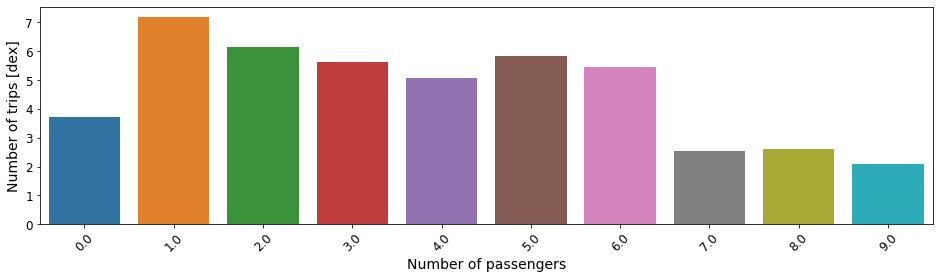

In [19]:
# Get number of unique trips with certain number of passengers
num_passengers = df_filtered.Passenger_count.value_counts(progress=True)

# Plot the result
plt.figure(figsize=(16, 4))
sns.barplot(x=num_passengers.index, y=np.log10(num_passengers.values))
plt.xlabel('Number of passengers')
plt.ylabel('Number of trips [dex]')
plt.xticks(rotation='45')
plt.show()